Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor

Importing Dataset

In [2]:
df = pd.read_csv("coin_BinanceCoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In [3]:
df.shape

(1442, 10)

From this, we got to know that there are 1442 rows of data available and for each row, we have 10 different features or columns.

In [4]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

From this, we got to know the datatype of each column

In [6]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1.442000e+03,1.442000e+03
mean,721.500000,54.764100,49.165813,52.028231,52.250308,6.269804e+08,7.835575e+09
std,416.413857,121.675817,108.118454,115.170060,115.390917,1.479775e+09,1.780041e+10
min,1.000000,0.101211,0.096109,0.099721,0.099867,9.284190e+03,9.986680e+06
25%,361.250000,10.390750,9.677340,10.037860,10.068350,5.089148e+07,1.157863e+09
50%,721.500000,16.592114,15.727250,16.210328,16.210569,1.981830e+08,2.451099e+09
75%,1081.750000,28.240910,26.963038,27.669888,27.691107,3.942378e+08,4.061743e+09
max,1442.000000,690.931965,631.465298,676.315905,675.684077,1.798295e+10,1.036722e+11


The above output generates statistical information for each numeric column:

count: number of non-missing values,
mean: arithmetic mean (average),
std: standard deviation,
min: minimum value,
25%: first quartile (25th perce,ntile),
50%: median (50th percentile),
75%: third quartile (75th perce,ntile),
max: maximum value

DATA PRE-PROCESSING

In [3]:
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

As from above output it is shown that the data has zero null values. 

In [4]:
df.drop(["SNo", "Name", "Symbol"], axis = 1,inplace= True)
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In the above step we dropped unnecessary columns.

FEATURE ENGINEERING AND DATA VISUALIZATION

In [5]:
df[["Date"]]= df.Date.apply(lambda x: pd.Series(str(x).split(" ")[:1]))
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2017-07-26,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2017-07-27,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,2017-07-28,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,2017-07-29,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,2017-07-30,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In the above step we updated the date column in YY-MM-DD format

In [6]:
df[["Year","Month"]]= df.Date.apply(lambda x: pd.Series(str(x).split("-")[:2]))
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month
0,2017-07-26,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,2017,07
1,2017-07-27,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,2017,07
2,2017-07-28,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,2017,07
3,2017-07-29,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,2017,07
4,2017-07-30,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,2017,07


In the above step we extract two features Year and Month from Date column

In [7]:
df.Year = df.Year.astype(int)
df.Month = df.Month.astype(int)

In the above step we changed the data type of Year and Month column from string to int

In [11]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
Year           int32
Month          int32
dtype: object

It is clearly shown that the data types are changed

Now, firstly we will analyze the closing price as we need it to perform the prediction.

Text(0.5, 1.0, 'Date vs Close')

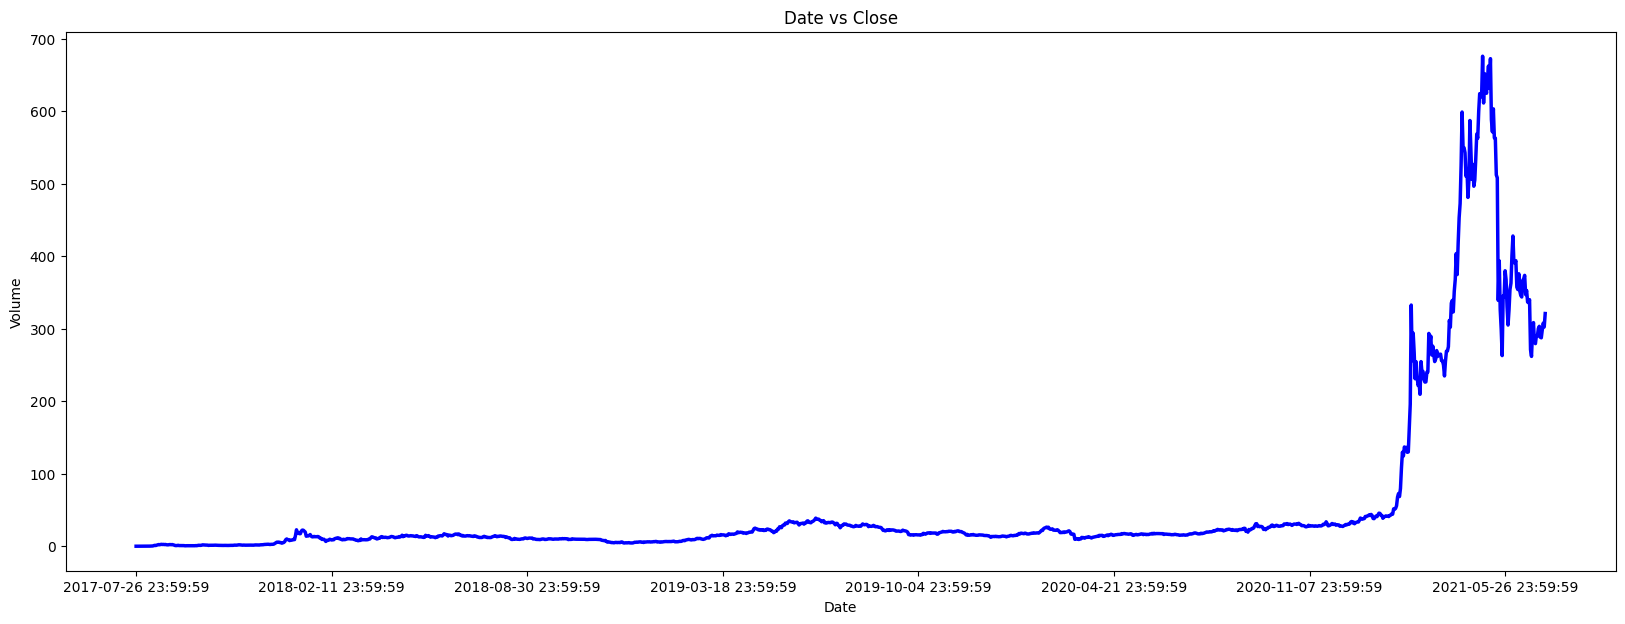

In [13]:
plt.figure(figsize=(20, 7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close")

This plot visualize the daily average closing prices of Binance Coin.
The prices of the Bitcoin stocks are showing an upward trend as depicted by the plot of the closing price of the Binance Coin


In [14]:
lst = list(df.Year.unique())
Unique_Year = np.array(lst[1:])
Unique_Year

array(['2018', '2019', '2020', '2021'], dtype='<U4')

We have created a list of unique categories in the Year column and then converted the list into numpy array. 

In [15]:
Unique_Year = Unique_Year.reshape(2,2)
Unique_Year

array([['2018', '2019'],
       ['2020', '2021']], dtype='<U4')

In the above code we reshape the array so that we can easily plot the lineplots for visualization.

Text(0.5, 1.0, 'Relation Between Open and Close in Year 2017')

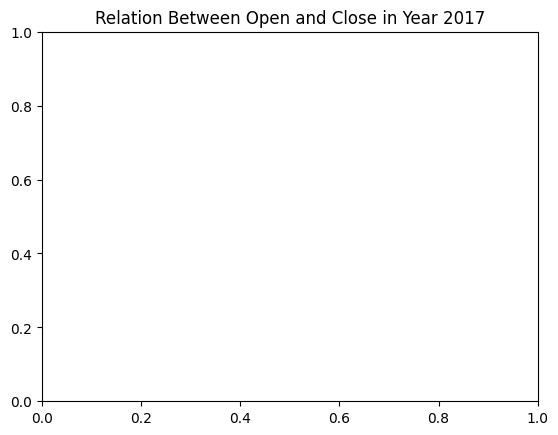

In [16]:
sns.lineplot(data = df[df.Year == 2017], x = "Open", y = "Close")
plt.title("Relation Between Open and Close in Year 2017")

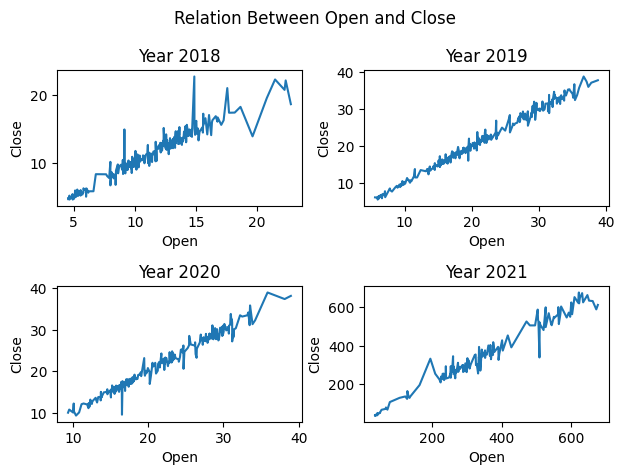

In [17]:
fig, axes = plt.subplots(2,2)
fig.suptitle("Relation Between Open and Close")

for row in range(0,2):
    for col in range(0, 2):
        fig.tight_layout()
        sns.lineplot(data = df[df.Year == Unique_Year[row, col]], x = "Open", y = "Close", ax = axes[row, col])
        axes[row, col].set_title(f'Year {Unique_Year[row, col]}')


The above line plots are showing the relationship between the opening and closing prices of Binance Coin.A linear trend between the opening and closing prices of Binance Coin (BNB) on a line plot indicates that there is a systematic relationship between these two variables.
The line slopes upwards from left to right, it suggests that as the opening price increases, the closing price tends to increase as well. 

In [18]:
features = ["Open", "High", "Low","Volume"]

C:\Users\Preeti\AppData\Local\Temp\ipykernel_16356\1913118995.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


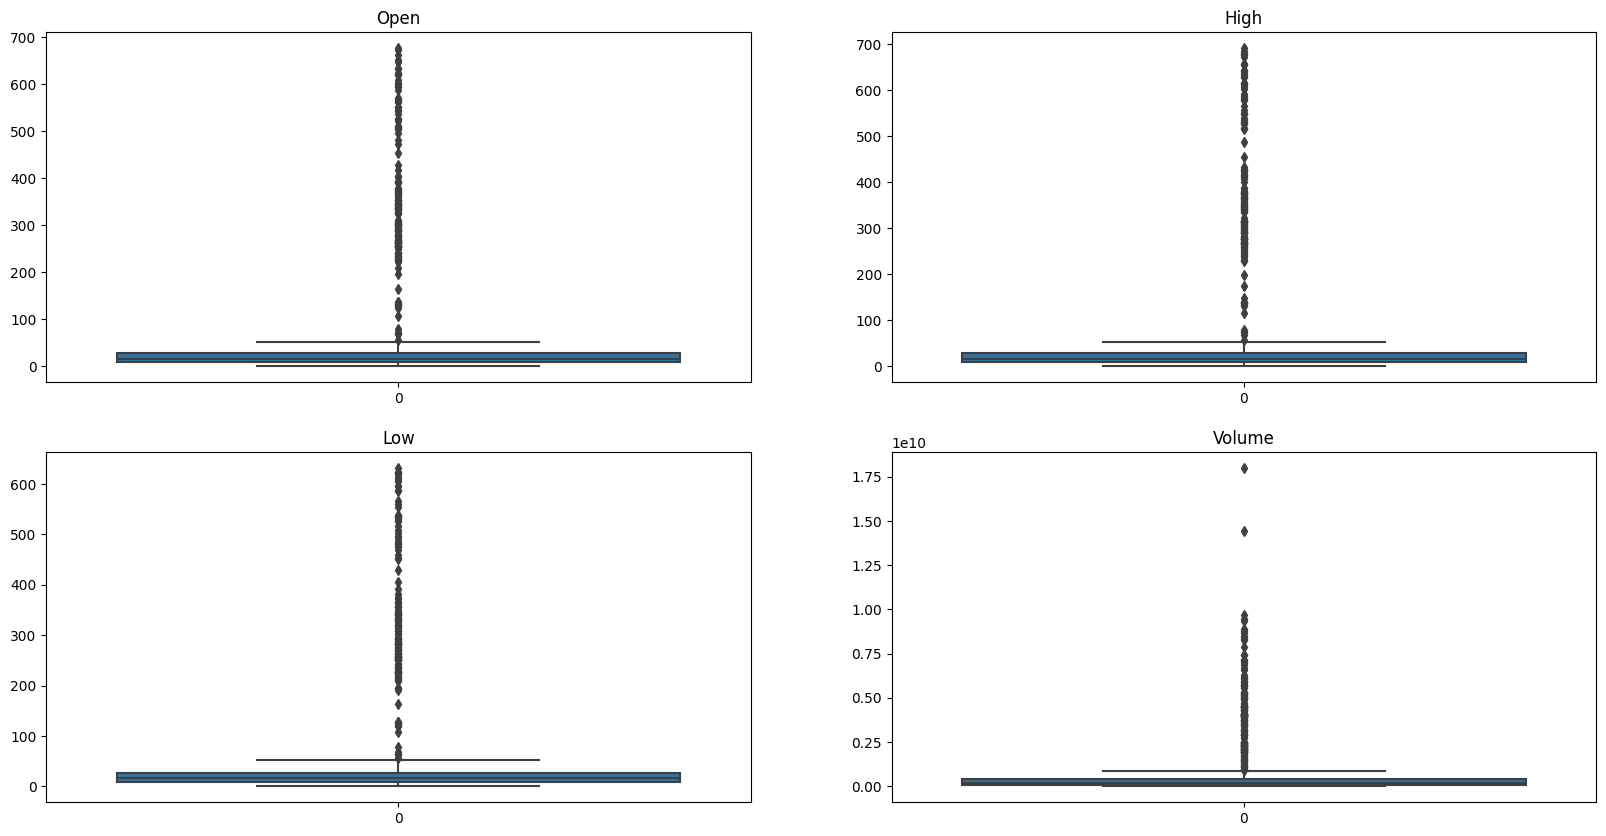

In [19]:
plt.subplots(figsize=(20,10))
# plt.title("Distribution of Features")
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.show()

The above boxplots help us to visualize the distribution of four features ("Open", "High", "Low" and "Volume").
There are so many outliers in the data which means that the prices of the Binance Coin have varied hugely in a very short period of time. Let’s check this with the help of a barplot. 

C:\Users\Preeti\AppData\Local\Temp\ipykernel_16356\2723327445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('Year').mean()
C:\Users\Preeti\AppData\Local\Temp\ipykernel_16356\2723327445.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


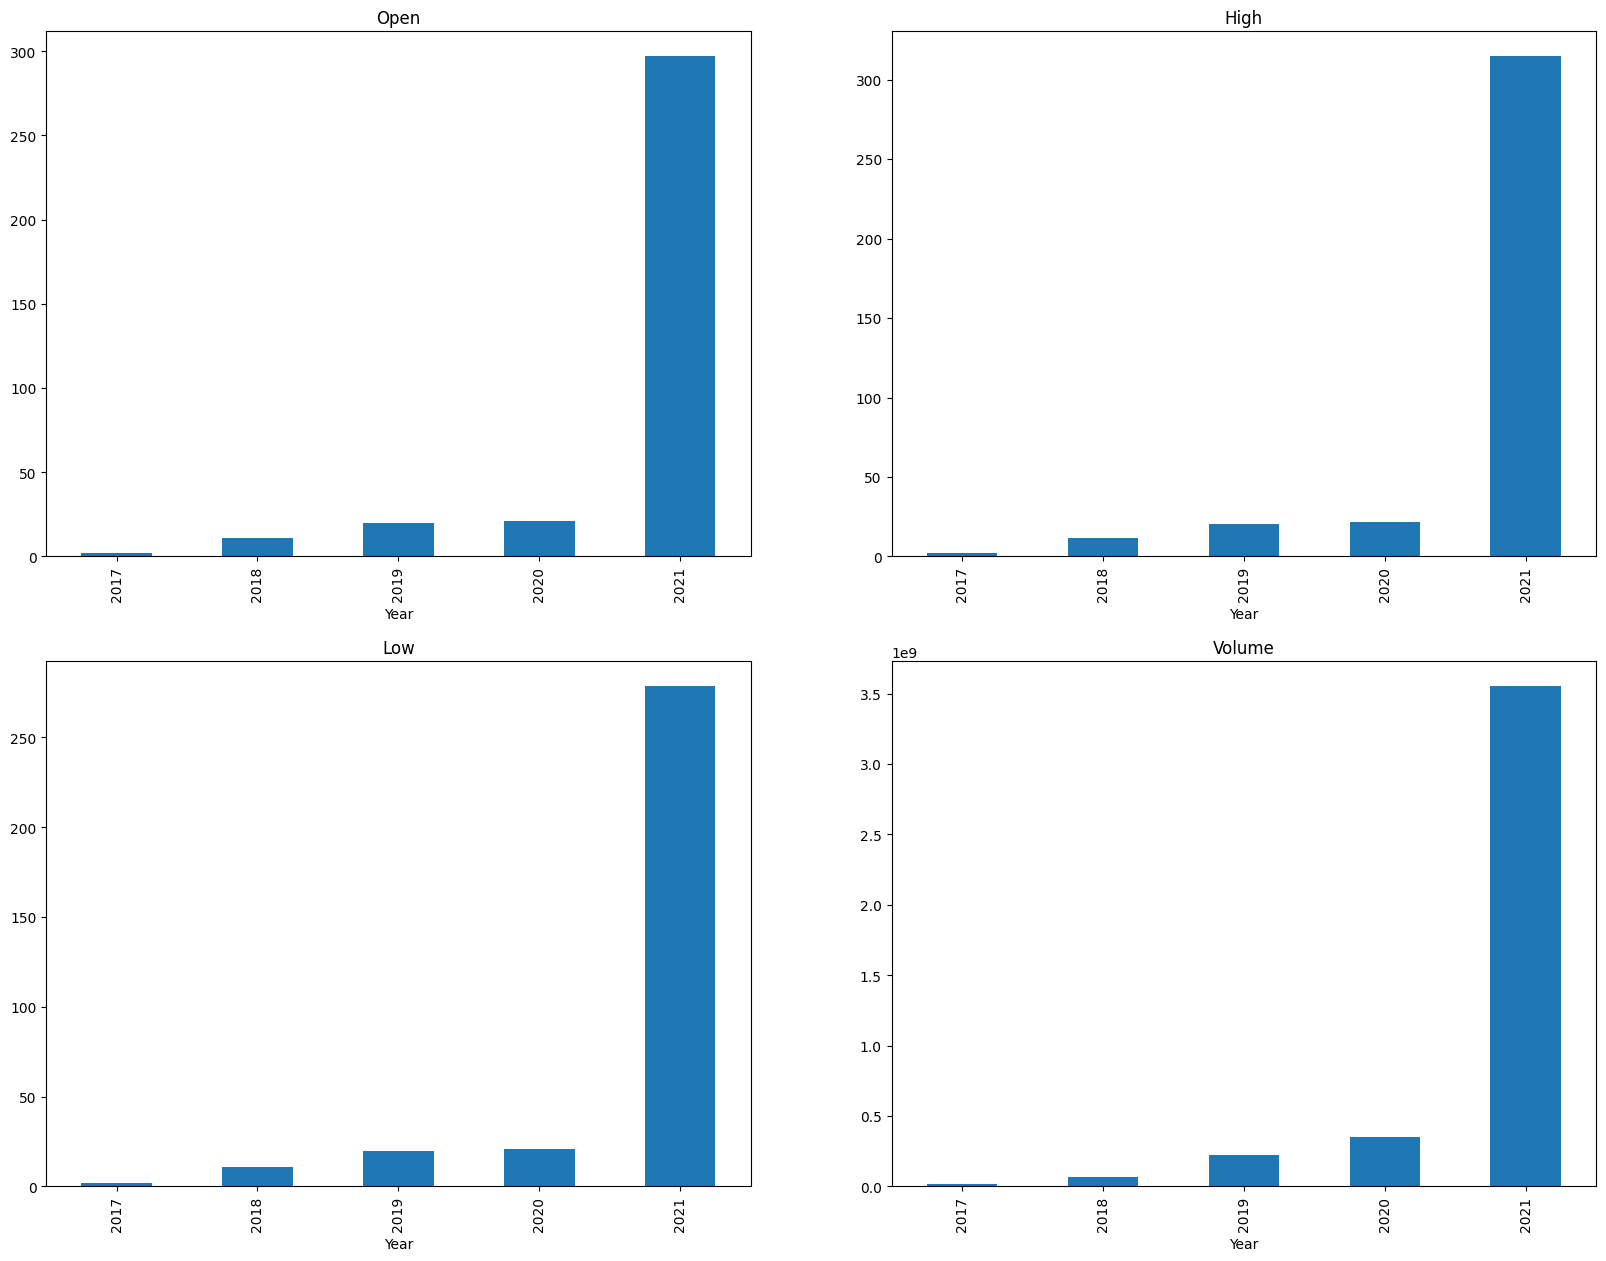

In [20]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,15))
for i, col in enumerate(['Open', 'High', 'Low', 'Volume']):
  fig.tight_layout()
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.title(col)
plt.show()

From the above bar plots we can observe why there are so many outliers in the data as the prices of binancecoin have exploded in the year 2021.

In [9]:
x = df[["High","Low","Open", "Volume"]]
y = df["Close"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In the above step we split the data into train and test data.

x_train consists the features which we are going to use to train the model

In [22]:
x_train.head()

,High,Low,Open,Volume
621,19.090576,18.073281,19.079069,1.782553e+08
1221,29.620145,27.985647,28.474954,3.382753e+08
630,19.889504,19.425251,19.825440,1.865630e+08
296,16.220501,12.053100,12.361400,2.432610e+08
1411,400.041176,382.344961,390.236724,2.101918e+09


x_test consists the features which we are going to used for test the model

In [23]:
x_test.head()

,High,Low,Open,Volume
411,9.708060,9.373060,9.576010,1.242790e+07
599,16.097116,15.682742,16.089241,1.316871e+08
551,7.189432,6.106819,7.091497,8.242720e+07
65,1.366980,1.135460,1.366980,8.474270e+06
377,13.908800,13.128600,13.658500,4.511950e+07


y_train consists the target which we are going to use to train the model

In [24]:
y_train.head()

621      18.113703
1221     29.143911
630      19.603350
296      15.135400
1411    393.820213
Name: Close, dtype: float64

y_test consists the target which we are going to use to test the model

In [25]:
y_test.head()

411     9.524870
599    15.761146
551     6.206182
65      1.266240
377    13.146100
Name: Close, dtype: float64

MODEL SELECTION

Decision Tree

In [11]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred_dt = regressor.predict(x_test)
y_pred_dt

array([9.71504000e+00, 1.60475590e+01, 7.10050020e+00, 1.37787998e+00,
       1.35290003e+01, 3.03295877e+02, 1.01130933e+01, 2.78839306e+01,
       1.44476004e+01, 9.65229034e+00, 9.69211006e+00, 2.02607926e+01,
       2.02060461e+01, 1.57410538e+01, 1.60267592e+01, 3.33609457e+01,
       1.35402002e+01, 1.46602001e+01, 9.36122000e+00, 1.21801004e+01,
       9.90758000e+00, 1.01130933e+01, 1.20199003e+01, 1.44476004e+01,
       1.97583191e+01, 1.43751106e+01, 1.46602001e+01, 1.00178000e+01,
       9.17059004e-01, 4.09189808e+01, 2.12646988e+01, 1.67095311e+01,
       1.20199003e+01, 1.09660561e+01, 3.15874834e+01, 1.36604519e+01,
       8.02425027e-01, 2.91016919e+01, 1.55052321e+01, 2.48527002e+00,
       9.14190960e+00, 1.30587997e+01, 9.65095000e+00, 1.94534672e+01,
       1.60267592e+01, 5.56875682e+00, 1.28357995e+00, 1.74847088e+01,
       2.77048361e+01, 1.82109804e+01, 2.79358023e+02, 1.82541916e+01,
       3.06595232e+01, 1.23869409e+01, 2.80641095e+01, 1.57579994e+00,
      

In [12]:
regressor.score(x_test, y_test, sample_weight=None)

0.9898591504874498

Random Forest 

In [14]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([9.63796040e+00, 1.59173408e+01, 6.80629420e+00, 1.26248021e+00,
       1.35548044e+01, 3.03758772e+02, 1.04924758e+01, 2.82406327e+01,
       1.47653301e+01, 9.56796975e+00, 9.22276366e+00, 2.04070005e+01,
       2.03185612e+01, 1.56840254e+01, 1.62843275e+01, 3.40194900e+01,
       1.35779728e+01, 1.41840188e+01, 9.31181743e+00, 1.20798767e+01,
       1.01026970e+01, 1.01241813e+01, 1.17472344e+01, 1.50095058e+01,
       1.97477308e+01, 1.42245139e+01, 1.39697288e+01, 1.00246935e+01,
       8.29376036e-01, 4.08541997e+01, 2.11400127e+01, 1.67324507e+01,
       1.14614459e+01, 1.08165076e+01, 3.23384959e+01, 1.34786724e+01,
       8.76767014e-01, 2.85281995e+01, 1.53883714e+01, 2.53873181e+00,
       9.38340175e+00, 1.32444963e+01, 9.87237821e+00, 1.93255387e+01,
       1.64111495e+01, 5.56693856e+00, 1.37946619e+00, 1.76205706e+01,
       2.77115124e+01, 1.83121874e+01, 2.64972737e+02, 1.82930984e+01,
       3.07953166e+01, 1.31432494e+01, 2.81612497e+01, 1.81756561e+00,
      

In [20]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(mean_squared_error(y_test,y_pred_rf))

0.9951055646963581
1.6602811877241734
51.2925210857613


MODEL TRAINING

Linear Regression

In [27]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)
with open('Binance.pkl','wb') as file:
    pickle.dump(model,file)

[9.49292895e+00 1.57833396e+01 6.44761510e+00 1.19845309e+00
 1.34230804e+01 2.87972302e+02 1.23361950e+01 2.91819169e+01
 1.46826736e+01 9.41493781e+00 9.43469647e+00 2.04288867e+01
 2.05527028e+01 1.59598175e+01 1.63675829e+01 3.36015714e+01
 1.37001695e+01 1.44142115e+01 9.31221116e+00 1.22462359e+01
 1.04337783e+01 1.13128450e+01 1.18933100e+01 1.49043475e+01
 1.96551454e+01 1.43727347e+01 1.39843396e+01 9.91178925e+00
 7.11270596e-01 4.02840333e+01 2.11236308e+01 1.57875835e+01
 1.12776513e+01 1.13949445e+01 3.15928593e+01 1.36562787e+01
 9.24767790e-01 2.84552284e+01 1.54457463e+01 2.41936224e+00
 9.34403503e+00 1.31986988e+01 9.96952399e+00 1.90326263e+01
 1.65176428e+01 5.58840753e+00 1.47677759e+00 1.74284258e+01
 2.74917579e+01 1.83530150e+01 2.44398302e+02 1.83388257e+01
 3.08041156e+01 1.33809816e+01 2.86085017e+01 1.88061294e+00
 1.48832295e+01 1.49361907e+01 3.19934239e+01 2.68690176e+02
 1.28360793e+01 1.65731778e+01 1.57856633e+01 3.11112981e+00
 2.78018998e+01 1.866652

MODEL EVALUATION

In [9]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9992794967151306
0.8022037295717828
